# Tolerance of network feature
In this tutorial, we will understand how to build a pipeline that visualizes the changes in the connectivity and fragmentation degree for a network that undergoes an increasing number of errors and attacks.
In particular, the network connectivity will be given by its **diameter**, while the fragmentation process by the **size of the giant component (S)** and the **average size of the other components (< s >)**. 
The network on which we will work is the global air traffic network.

First, we must set the parameters for the error/attack simulation. We also set a random seed for reproducibility.

**Note**: in the case you wanted to create the Erdos-Renyi (ER) or the scale-free (SF) network, remember to set the number of nodes (```N```) and the probability of connection (```p```)

In [1]:
import random
import numpy as np

# for reproducibility
seed = 102
random.seed(seed)
np.random.seed(seed)

Then we can create the network and use ```ToleranceSimulation``` class to initialize the simulation of node remotion.

In [2]:
from network_code import generate_network 
G = generate_network("airports")

from network_code import ToleranceSimulation

# simulate an increasing number of errors/attacks
Simulator = ToleranceSimulation(G)


**Connectivity part**

Now, we can simulate how an increasing introduction of errors and attacks may affect the network **diameter** and visualize it in a plot.

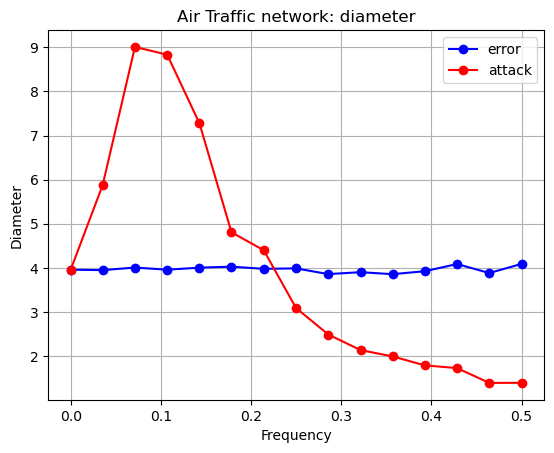

In [3]:
from network_code import connectivity_analysis
from network_code import make_plot

# data for the diameter
freq, d_error, d_attack = connectivity_analysis(Simulator)
# plot the diameter
fig, ax = make_plot(freq, 
                    d_error, d_attack,
                    ylabel='Diameter', 
                    title='Air Traffic network: diameter')

Here instead, we register the fragmentation process, visualizing the **S** and **< s >** trends

**Note:** if you want to reproduce the results present in the ['report'](url), be sure to use the same parameters reported there.                       

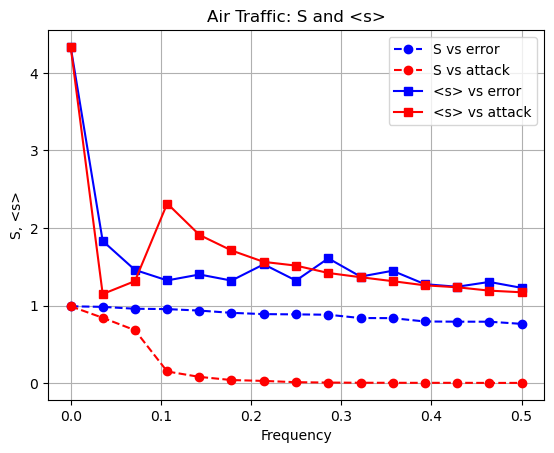

In [4]:
from network_code import fragmentation_analysis
from network_code import make_plot_fragmentation

# data for fragmentation
freq, S_error, S_attack, s_error, s_attack = fragmentation_analysis(Simulator)

fig, ax = make_plot_fragmentation(freq, 
                             S_error, S_attack, s_error, s_attack,  
                             ylabel='S, <s>',
                             title='Air Traffic: S and <s>')